In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\New folder\\netflix_titles.csv")

In [30]:
data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [31]:
data.shape

(8807, 12)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [33]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [37]:
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7982,7982,7982,7982,7982,7982,7982,7982.000000,7982,7979,7982,7982
unique,7982,2,7982,4153,7692,690,1711,NaN,18,216,504,7956
top,s2,Movie,Blood & Water,Unknown,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,5656,1,2282,19,2488,107,NaN,2881,1508,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.958532,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.717735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


# Clean the Data

In [49]:
data['country'].fillna("Unknown", inplace=True)
data['rating'].fillna("Not Rated", inplace=True)
data['date_added'].fillna("Unknown", inplace=True)
data.dropna(subset=['cast'], inplace=True) # Drop if no cast info
data['director'].fillna("Unknown", inplace=True)

In [38]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


# Visualizations

### Content Type (Movies or TV Show)

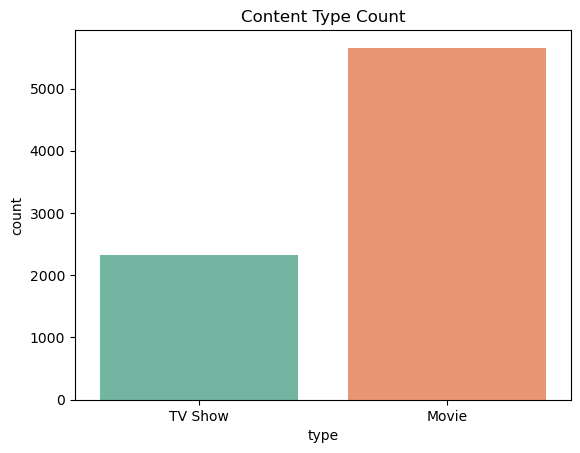

In [39]:
sns.countplot(x='type', data=data, palette='Set2')
plt.title("Content Type Count")
plt.show()

### Year-wise Content Release

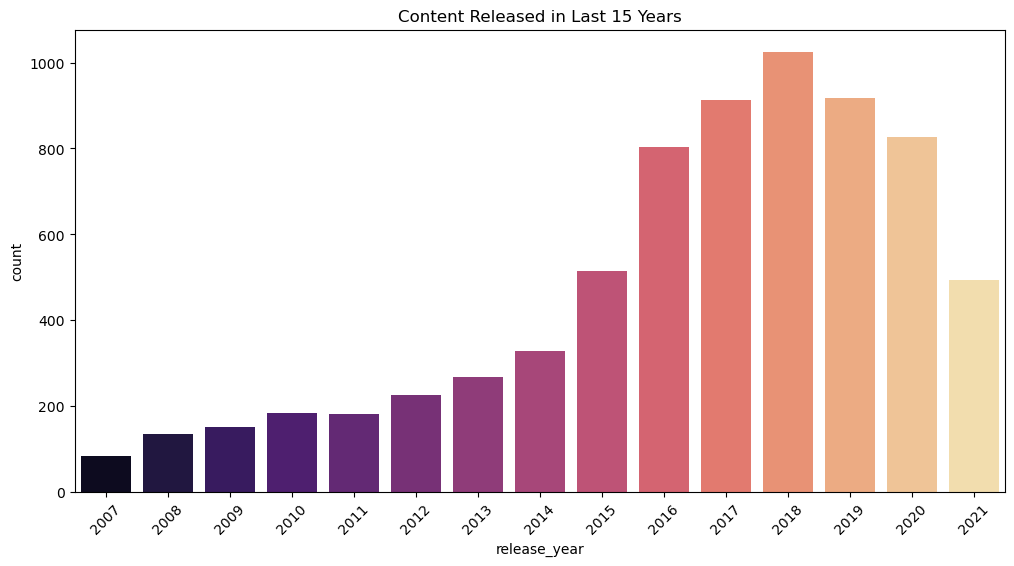

In [40]:
# Extract release year
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

# Plot
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=data, order=sorted(data['release_year'].unique())[-15:], palette='magma')
plt.title("Content Released in Last 15 Years")
plt.xticks(rotation=45)
plt.show()

### Top 10 Countries Producing Content

In [41]:
top_countries = data['country'].value_counts().head(10)

In [42]:
top_countries

country
United States     2488
India              940
Unknown            677
United Kingdom     351
Japan              240
South Korea        196
Canada             162
Spain              127
France             106
Turkey             105
Name: count, dtype: int64

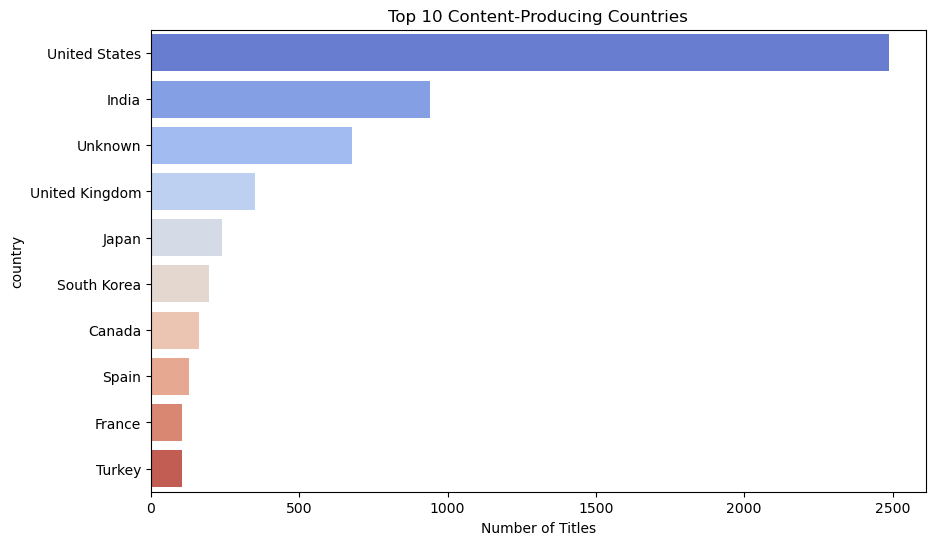

In [43]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Number of Titles")
plt.show()

### Top Genres (listed in ‘listed_in’ column)

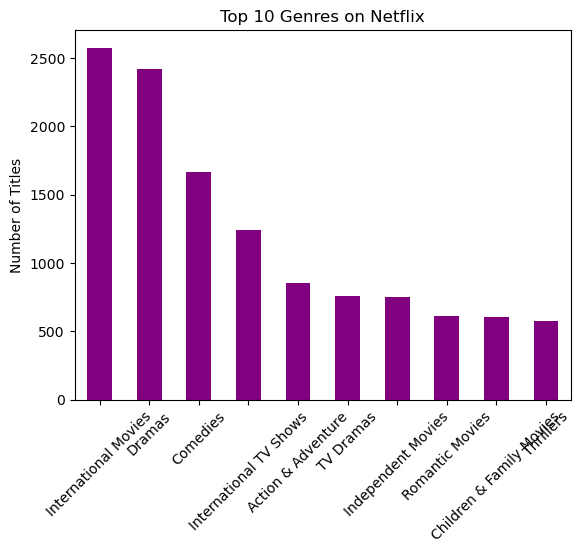

In [44]:
# Split genres
from collections import Counter

genres = data['listed_in'].str.split(', ')
flat_genres = [genre for sublist in genres.dropna() for genre in sublist]
top_genres = pd.Series(Counter(flat_genres)).sort_values(ascending=False).head(10)

top_genres.plot(kind='bar', color='purple')
plt.title("Top 10 Genres on Netflix")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

### Number ofShow Added Over Time 

In [46]:
# Convert data
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year_added']= data['date_added'].dt.year

In [47]:
data.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0


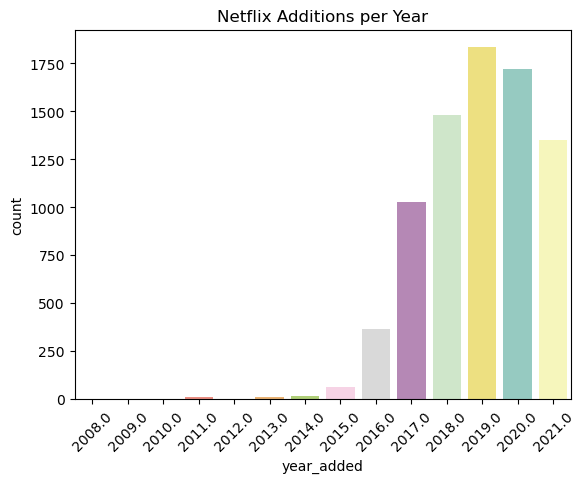

In [48]:
#Plot
sns.countplot(x='year_added',data=data, palette='Set3')
plt.title("Netflix Additions per Year")
plt.xticks(rotation=45)
plt.show()

# Conclusion

From the Netflix EDA:
    
    -Movies are more than TV shows.
    -Most content comes from the USA and India.
    -Dramas and comedies are top genres.
    -Netflix added the most content around 2019-2020.